# Week3

#### Mandatory Part
Check the head of the dataset...

In [1]:
import pandas as pd

salaries = pd.read_csv("datasets/Salaries.csv")
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


Use the .info() method to find out how many entries there are.

In [2]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


Check the highest amount ofOvertimePay in the dataset.

In [3]:
salaries['OvertimePay'].max()

245131.88

What is the job title of JOSEPH DRISCOLL?

In [ ]:
salaries[salaries['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

How much does JOSEPH DRISCOLL make(including benefits)?

In [ ]:
salaries[salaries['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']

What is the name of highest paidperson (including benefits)?

In [8]:
print(salaries[salaries['TotalPayBenefits']== salaries['TotalPayBenefits'].max()]['EmployeeName'])
# or
print(salaries.loc[salaries['TotalPayBenefits'].idxmax()]['EmployeeName'])

0    NATHANIEL FORD
Name: EmployeeName, dtype: object
NATHANIEL FORD


What is the name of lowest paidperson (including benefits)? Do younotice something strange about howmuch he or she is paid?

In [9]:
salaries[salaries['TotalPayBenefits']== salaries['TotalPayBenefits'].min()]
"""Negative paid value Strange"""

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


What was the average (mean) BasePayof all employees per year? (2011-2014)?

In [12]:
salaries.groupby("Year").mean()["BasePay"]

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

How many unique job titles are there?

In [17]:
print(len(salaries["JobTitle"].unique()))
# or
print(salaries["JobTitle"].nunique())

2159
2159


What are the top 5 most common jobs?

In [21]:
salaries["JobTitle"].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

How many Job Titles were representedby only one person in 2013? (e.g. JobTitles with only one occurence in 2013?)

In [25]:
sum(salaries[salaries['Year'] == 2013]["JobTitle"].value_counts() == 1)

202

How many people have the word Chief in their job title?

In [28]:
sum(salaries["JobTitle"].apply(lambda x : True if "chief" in x.lower() else False))

627

### Film e serie TV netflix

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

titles = pd.read_csv("datasets/titles.csv")
titles.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [132]:
print(titles.info())
print(titles.isna().sum())
# titles['imdb_votes'].fillna(titles['imdb_votes'].median(), inplace=True)
# titles['imdb_score'].fillna(int(titles['imdb_score'].mean()), inplace=True)
titles.dropna(axis=0, subset=["imdb_votes", "imdb_id", "age_certification", "production_countries", "genres", "seasons", "description"], inplace=True)
print(titles.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In quali anni sono stati rilasciati il maggior numero di film presenti su netflix?

<AxesSubplot:>

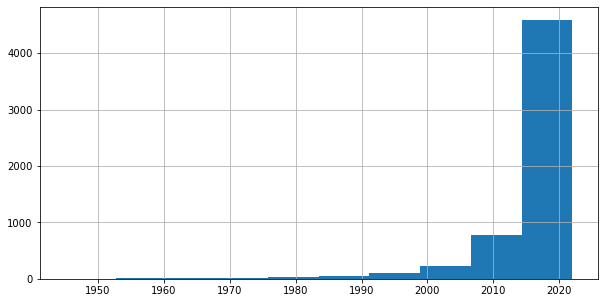

In [20]:
titles["release_year"].hist(figsize=(10, 5))

Ci sono più film o serie tv?

<BarContainer object of 2 artists>

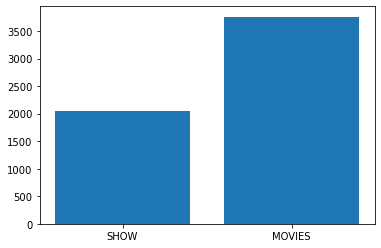

In [33]:

plt.bar(["SHOW", "MOVIES"],[titles[titles["type"] == "SHOW"].count()[0],titles[titles["type"] == "MOVIE"].count()[0]])


Quali sono i generi più popolari e quali con un punteggio medio imdb più alto?

In [133]:
def get_genres(arr):
    arr = ast.literal_eval(arr)
    if len(arr) == 0:
        return np.nan
    elif len(arr) >= 1:
        return arr[0]
titles["genres"] = titles["genres"].apply(lambda x: get_genres(x))


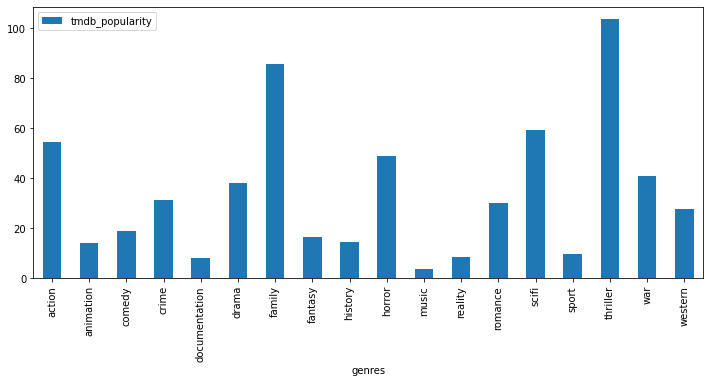

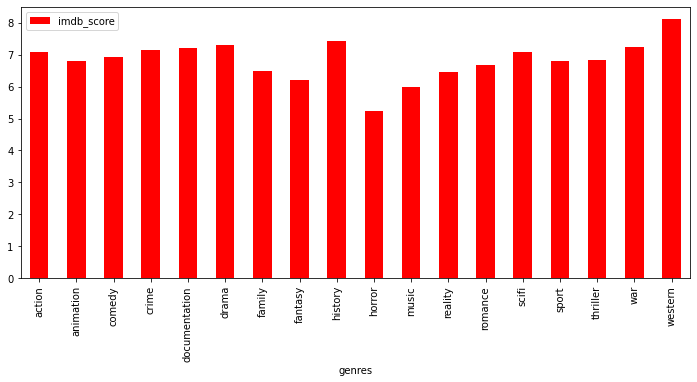

In [150]:
titles["genres"].unique()
        
fig = plt.figure()
fig.set_size_inches(12, 5)
titles.groupby('genres')["tmdb_popularity"].mean().plot(kind = "bar", legend=True)
plt.show()
fig = plt.figure()
fig.set_size_inches(12, 5)
titles.groupby('genres')["imdb_score"].mean().plot(kind = "bar",legend=True, color="red")
plt.show()


<AxesSubplot:xlabel='genres'>

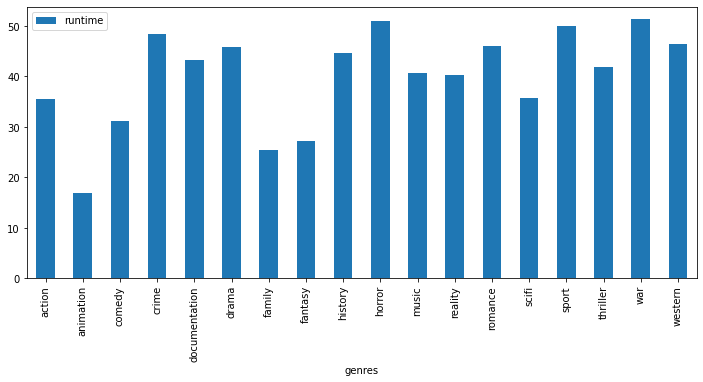

In [140]:
fig = plt.figure()
fig.set_size_inches(12, 5)
titles.groupby("genres")["runtime"].mean().plot(kind = "bar",legend = True, )

In che anni sono stati rilasciati i film più popolari nati negli US?

<AxesSubplot:xlabel='release_year', ylabel='imdb_score'>

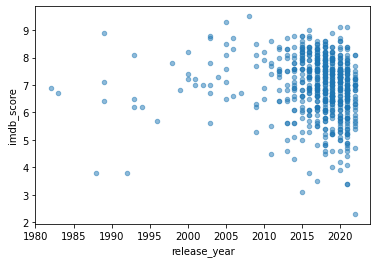

In [159]:
titles[titles["production_countries"] == "['US']"].plot.scatter(x="release_year", y="imdb_score", alpha=0.5)